# Sales Analysis

#### Import necessary libraries

In [64]:
import os
import pandas as pd

#### Merge data from each month into one CSV

In [65]:


files = [ file for file in os.listdir() if not file.startswith(".") and not file.endswith("ipynb")]


all_months_data = pd.DataFrame()

for file in files:
    data = pd.read_csv(file)
    all_months_data =pd.concat([all_months_data,data])
    
all_months_data.to_csv("all_data.csv", index = False)

#### Read in updated dataframe

In [66]:
all_data = pd.read_csv("all_data.csv")
all_data.head()
all_data.shape

(747400, 6)

### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [67]:
#find NaN
nan_df = all_data[all_data.isna().any(axis=1)]

nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

##### Get rid of text in order date column

In [68]:
#all_data[all_data['Order Date'].str[0:2]!='Or']


all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data


Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
747395   259353      AAA Batteries (4-pack)                3       2.99   
747396   259354                      iPhone                1        700   
747397   259355                      iPhone                1        700   
747398   259356      34in Ultrawide Monitor                1     379.99   
747399   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001  
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
5       04/30/19 09:27        333 8th St, Los Angeles, CA 90001  
...                ...                                      ...  
747395  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  
747396  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016  
747397  09/23/19 07:39     220 12th St, San Francisco, CA 94016  
747398  09/19/19 17:30   511 Forest St, San Francisco, CA 94016  
747399  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  

[743800 rows x 6 columns]

#### Make columns correct type

In [69]:
# converting to numeric column
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])


all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### Augment data with additional columns

#### Add month column

In [70]:
# create new column Month
all_data['Month'] = all_data['Order Date'].str[0:2]
# converting the string type to int
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4

#### Add month column (alternative method)

#### Add city column

In [71]:


def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[0]


all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x) )
all_data




Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
747395   259353      AAA Batteries (4-pack)                 3        2.99   
747396   259354                      iPhone                 1      700.00   
747397   259355                      iPhone                 1      700.00   
747398   259356      34in Ultrawide Monitor                 1      379.99   
747399   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address  Month  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001      4   
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215      4   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   
5       04/30/19 09:27        333 8th St, Los Angeles, CA 90001      4   
...                ...                                      ...    ...   
747395  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001      9   
747396  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016      9   
747397  09/23/19 07:39     220 12th St, San Francisco, CA 94016      9   
747398  09/19/19 17:30   511 Forest St, San Francisco, CA 94016      9   
747399  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016      9   

                 City  
0              Dallas  
2              Boston  
3         Los Angeles  
4         Los Angeles  
5         Los Angeles  
...               ...  
747395    Los Angeles  
747396  San Francisco  
747397  San Francisco  
747398  San Francisco  
747399  San Francisco  

[743800 rows x 8 columns]

## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [72]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int')  * all_data['Price Each'].astype('float')


output = all_data.groupby(['Month']).sum()
output['Sales'] = output['Sales'].astype('int64') 
output['Price Each'] = output['Price Each'].astype('int64') 
output

Quantity Ordered  Price Each     Sales
Month                                        
1                 43612     7247073   7289026
2                 53796     8755538   8808089
3                 68020    11164831  11228401
4                 82232    13470684  13562680
5                 74668    12540500  12610427
6                 61012    10248102  10311209
7                 64288    10530158  10591103
8                 53792     8921381   8977871
9                 52436     8339968   8390240
10                90812    14862219  14946907
11                79192    12722402  12798412
12               112456    18353661  18453773

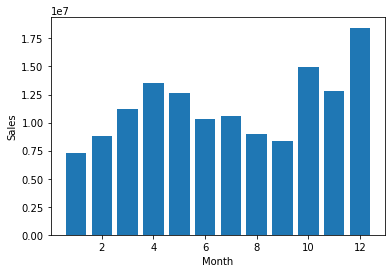

In [75]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'],)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

#### Question 2: What city sold the most product?

In [76]:
all_data.groupby(['City']).sum()

Quantity Ordered    Price Each    Month         Sales
City                                                                
Atlanta                   66408  1.111963e+07   419176  1.118199e+07
Austin                    44612  7.239494e+06   279316  7.278327e+06
Boston                    90112  1.454964e+07   564448  1.464657e+07
Dallas                    66920  1.101051e+07   418480  1.107190e+07
Los Angeles              133156  2.168574e+07   833300  2.181028e+07
New York City            111728  1.854148e+07   702964  1.865727e+07
Portland                  56212  9.230990e+06   351060  9.281962e+06
San Francisco            200956  3.284585e+07  1262080  3.304882e+07
Seattle                   66212  1.093318e+07   419764  1.099102e+07

Text(0, 0.5, 'Sales')

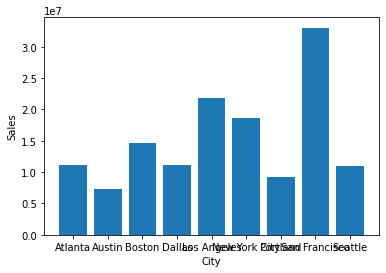

In [78]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby(['City'])]

plt.bar(cities,all_data.groupby(['City']).sum()['Sales'])

plt.xlabel('City')
plt.ylabel('Sales')

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [79]:
# Add hour column  
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month         City  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4       Dallas   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4       Boston   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  Los Angeles   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  Los Angeles   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  Los Angeles   

    Sales  Hour  Minute  Count  
0   23.90     8      46      1  
2   99.99    22      30      1  
3  600.00    14      38      1  
4   11.99    14      38      1  
5   11.99     9      27      1

ConversionError: Failed to convert value(s) to axis units: ['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle']

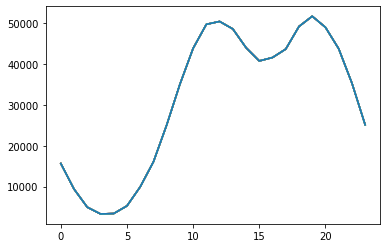

In [87]:
hours = [pair for pair, df in all_data.groupby(['Hour'])]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(keys)

#### Question 4: What products are most often sold together?

#### What product sold the most? Why do you think it sold the most?